<a href="https://colab.research.google.com/github/pedroolins/Analise-descritiva-PNAD-2015/blob/main/An%C3%A1lise_Descritiva_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10> PROJETO DO CURSO DE ESTATÍSTICA ALURA - PARTE 1</font>
***

## Projeto de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos no treinamento realizei uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Irei construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importando bibliotecas que irei utilizar

In [34]:
import pandas as pd 
import seaborn as sns
import numpy as np

### Importanndo o dataset e armazenando o conteúdo em uma DataFrame




In [35]:
dados = pd.read_csv('dados.csv')

### Visualizando o conteúdo do DataFrame

In [36]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda foi observado que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.



### 1º Definindo os intevalos das classes em reais (R$)

In [37]:
# observando qual valor minimo e max do nosso dataset
min = dados.Renda.min()
max = dados.Renda.max()
classes = [min, 2*788, 5*788, 15*788, 25*788, max]
print(classes)

[0, 1576, 3940, 11820, 19700, 200000]


### 2º Definindo os labels das classes

In [38]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construindo a coluna de frequências

In [39]:
frequencia = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, 
                      labels = labels, include_lowest = True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construindo a coluna de percentuais

In [40]:
percentual = pd.cut(x = dados.Renda, bins = classes,
                              labels= labels, 
                              include_lowest = True).value_counts(normalize = True).round(2)*100
percentual

E    65.0
D    24.0
C     9.0
B     1.0
A     1.0
Name: Renda, dtype: float64

### 5º Juntando as colunas de frequência e percentuais e ordenando as linhas de acordo com os labels das classes

In [41]:
tabela = pd.DataFrame(data = {'frequencia': frequencia,
                              'percentual': percentual})
tabela.rename_axis('classes', axis = 1, inplace= True)
tabela.sort_index(ascending = False, inplace = True)
tabela

classes,frequencia,percentual
A,420,1.0
B,822,1.0
C,7241,9.0
D,18602,24.0
E,49755,65.0


### Construindo um gráfico de barras para visualizar as informações da tabela de frequências acima

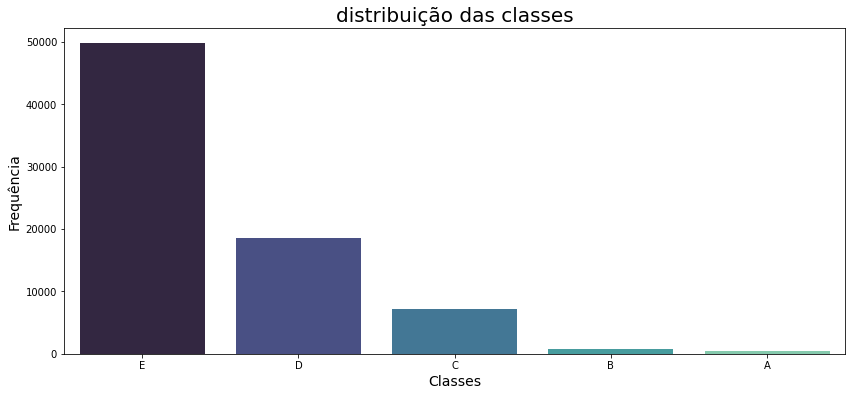

In [42]:
grafico1 = sns.barplot(data = tabela, 
                       x = tabela.index, y = 'frequencia', palette = 'mako')
grafico1.figure.set_size_inches(14,6)
grafico1.set_xlabel('Classes', fontsize = 14)
grafico1.set_ylabel('Frequência', fontsize = 14)
grafico1.set_title('distribuição das classes', fontsize = 20);

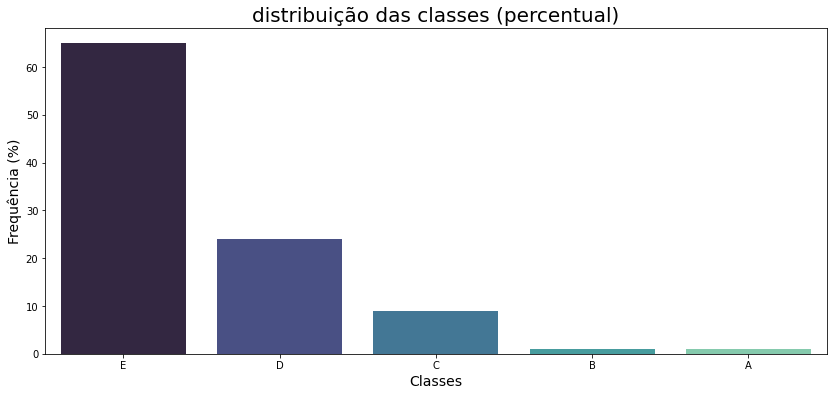

In [43]:
grafico2 = sns.barplot(data = tabela, 
                       x = tabela.index, y = 'percentual', palette = 'mako')
grafico2.figure.set_size_inches(14,6)
grafico2.set_xlabel('Classes', fontsize = 14)
grafico2.set_ylabel('Frequência (%)', fontsize = 14)
grafico2.set_title('distribuição das classes (percentual)', fontsize = 20);

> ### Conclusões

Com a análise da renda vemos que a desigualdade no país é enorme onde a maior parte da pessoas estão na classe E e uma pequena minoria na classe A e B

### Criando um histograma para as variáveis QUANTITATIVAS de nosso dataset


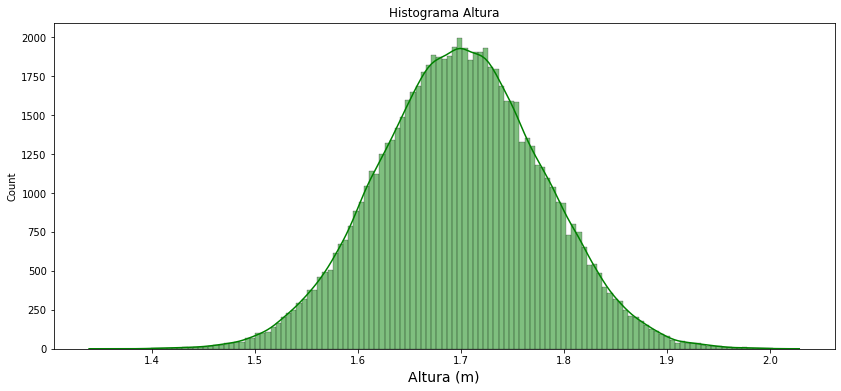

In [72]:
gráfico3 = sns.histplot(dados.Altura, color = 'g', kde = True)
gráfico3.figure.set_size_inches(14, 6)
gráfico3.set_xlabel('Altura (m)', fontsize = 14 )
gráfico3.set_title('Histograma Altura');

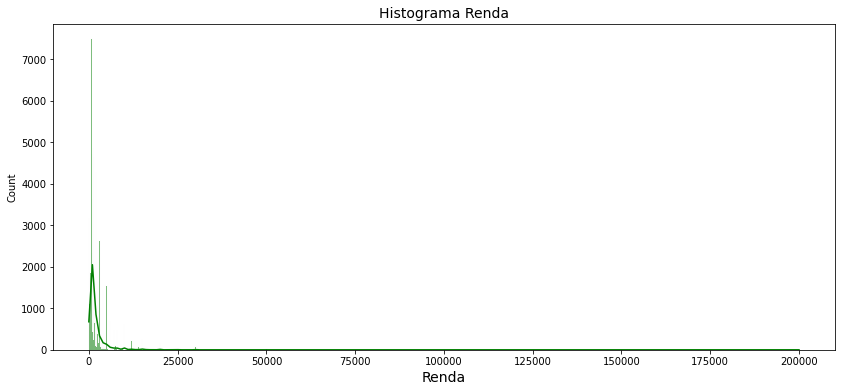

In [75]:
gráfico4 = sns.histplot(dados.Renda, kde = True, color = 'g')
gráfico4.figure.set_size_inches(14, 6)
gráfico4.set_xlabel('Renda', fontsize = 14 )
gráfico4.set_title('Histograma Renda', fontsize =14);

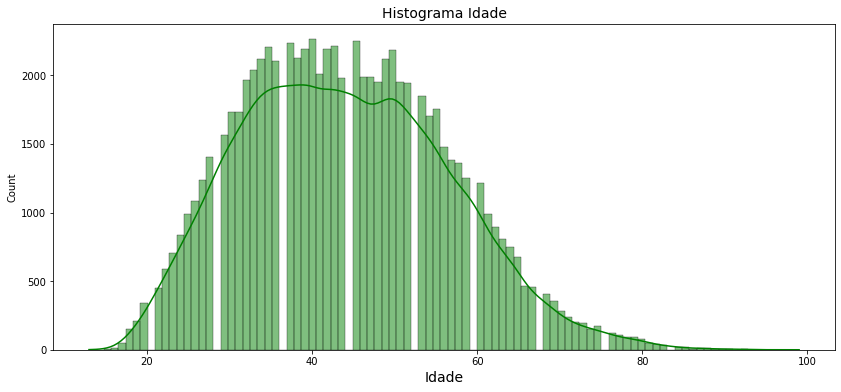

In [77]:
gráfico5 = sns.histplot(dados.Idade, color = 'green', kde = True)
gráfico5.figure.set_size_inches(14, 6)
gráfico5.set_xlabel('Idade', fontsize = 14 )
gráfico5.set_title('Histograma Idade', fontsize = 14);

> ### Conclusões

O primeiro histograma da altura apresenta uma dsitribuição simétrica, porém as distribuições de renda e idade apresentam uma distribuição assimétrica à direita.

A variável Altura apresenta perfeitamente uma distribuição simétrica pois foi de elaborção própria, já a variável renda apresenta uma distribuição assimétrica à direita devido a maioria das pessoas receberem um salário mínimo ou um pouco acima disso e uma pequena parcela da população receber uma remuneração bem alta. Com isso, a distribuição fica uma pouco ruim de ser visualizada devido a essa pequena parcela da população que puxa bastante a distribuição para a direita. 

Além disso, a variável Idade apresenta uma distribuição simétrica à direita, pois a alguns dos chefes de família da pesquisa apresentam idade bem elevada

### Construindo um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00 para obtermos uma melhor visualização

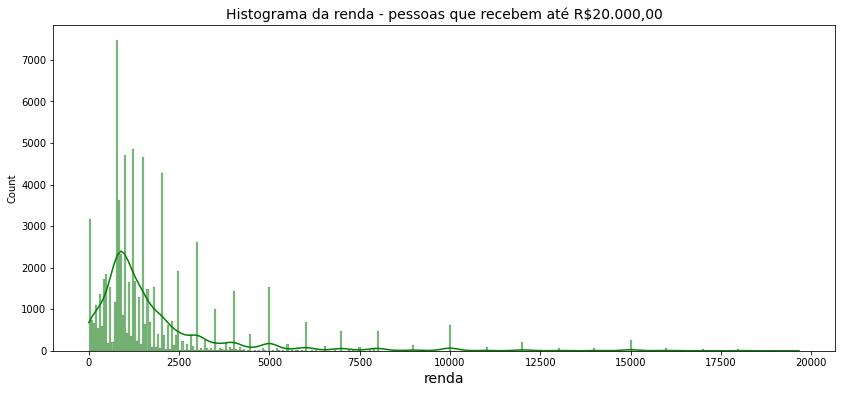

In [79]:
#construindo um histograma para variável renda,com apenas pessoas que recebem até 20.000 reais
renda_20000 = dados.Renda[dados.Renda < 20000]
gráfico6 = sns.histplot(renda_20000, color = 'g', kde = True)
gráfico6.figure.set_size_inches(14,6)
gráfico6.set_title('Histograma da renda - pessoas que recebem até R$20.000,00', fontsize =14)
gráfico6.set_xlabel('renda', fontsize = 14);

### Construindo uma tabela de frequências e uma com os valores percentuais dessas frequências a partir do cruzamento das variáveis SEXO e COR


In [48]:
#definindo os dicionários que serão utilizados nos próximos passos
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [49]:
tabela_s_c = pd.crosstab(dados.Cor, dados.Sexo)
tabela_s_c.rename(index = cor, columns= sexo, inplace = True)
tabela_s_c

Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [50]:
tabela_s_c_percent = pd.crosstab(dados.Cor, dados.Sexo, normalize = True).round(4)*100
tabela_s_c_percent.rename(index = cor, columns = sexo, inplace = True)
tabela_s_c_percent

Sexo,Masculino,Feminino
Cor,,
Indígena,0.33,0.13
Branca,28.88,12.52
Preta,7.16,3.76
Amarela,0.31,0.15
Parda,32.62,14.14


> ### Conclusões

Como Foram considerados somente os registros das Pessoas de Referência de cada domicílio (responsável pelo domicílio).
Vemos que os homens pardos representam a maioria e as mulheres indígenas a minoria. 

Observando as tabelas acima, é visível que segundo os dados da pesquisa os homens são em maioria as pessoas de referência do que as mulheres.

Dentre os Homens os pardos e Brancos representam a maioria, e entre as mulhures também são as pardas e brancas que representam a maioria.

## Realizando, para a variável RENDA, uma análise descritiva com as ferramentas que aprendi no treinamento

### A média aritimética

In [51]:
print(f'Média: R${round(dados.Renda.mean(),2)}')

Média: 2000.38


### A mediana

In [52]:
print(f'Mediana: R${round(dados.Renda.median(),2)}')

Mediana: 1200.0


### A moda

In [53]:
print(f'Moda: R${round(dados.Renda.mode()[0],2)}')

Moda: 788


### O desvio médio absoluto

In [54]:
print(f'Desvio médio absoluto: R${round(dados.Renda.mad(),2)}')

Desvio médio absoluto: 1526.5


### A variância amostral

In [55]:
print(f'Variância amostral: {round(dados.Renda.var(),2)}')

Variância amostral: 11044906.01


### O desvio-padrão amostral

In [56]:
print(f'Desvio padrão amostral: R${round(dados.Renda.mean(),2)}')

Desvio padrão amostral: 2000.38


### Observando a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [57]:
func = {'mean', 'median', 'max'}
renda_sexo_cor = pd.crosstab(index = dados.Cor, 
                         columns = dados.Sexo,
                         values = dados.Renda,
                         aggfunc = func).round(2)
renda_sexo_cor.rename(index = cor, columns = sexo, inplace = True)
renda_sexo_cor

max                mean             median         
Sexo     Masculino  Feminino Masculino Feminino Masculino Feminino
Cor                                                               
Indígena   10000.0  120000.0   1081.71  2464.39     797.5    788.0
Branca    200000.0  100000.0   2925.74  2109.87    1700.0   1200.0
Preta      50000.0   23000.0   1603.86  1134.60    1200.0    800.0
Amarela    50000.0   20000.0   4758.25  3027.34    2800.0   1500.0
Parda     100000.0   30000.0   1659.58  1176.76    1200.0    800.0

> ### Conclusões

A partir da tabela acima fica claro que na pesquisa os homens e mulheres da cor amarela e branca são os que apresentam uma renda maior em relação aos demais e os indígenas são os que apresentam pior renda entre os demais.
Mesmo que os indígenas do sexo feminino apresentem uma renda média maior que as dos negros e pardos por exemplo, isto pode estar ocorendo devido a um dado esta muito disperso dos demais o que acaba prejudicando a média.

### Observando as medidas de dispersão da variável RENDA segundo SEXO e COR

In [58]:
func2 = {'mad', 'var', 'std'}
renda_sexo_cor2 = pd.crosstab(index = dados.Cor, 
                         columns = dados.Sexo,
                         values = dados.Renda,
                         aggfunc = func2).round(2)
renda_sexo_cor2.rename(index = cor, columns = sexo, inplace = True)
renda_sexo_cor2

mad                std                    var              
Sexo     Masculino Feminino Masculino  Feminino    Masculino      Feminino
Cor                                                                       
Indígena    798.91  3007.89   1204.09  11957.50   1449841.13  1.429818e+08
Branca     2261.01  1670.97   4750.79   3251.01  22570023.41  1.056909e+07
Preta       975.60   705.45   1936.31   1349.80   3749293.59  1.821960e+06
Amarela    3709.60  2549.15   5740.82   3731.17  32957069.62  1.392166e+07
Parda      1125.83   811.58   2312.09   1596.23   5345747.15  2.547960e+06

> ### Conclusões

Agora apresentando uma tabela de com as medidas de dispersão fica visível que os alguns dados estão muito dispersos na váriavel renda pois o elevado devio padrão nos mostra justamente isso. 
E como mencionado anteriormente na conclusão da tabela de medidas de tendência central, os indígenas do sexo feminino apresentam a maior dispersão entre os dados de renda.

### Construindo um box plot da variável RENDA segundo SEXO e COR, com dados de renda até R$10.000,00

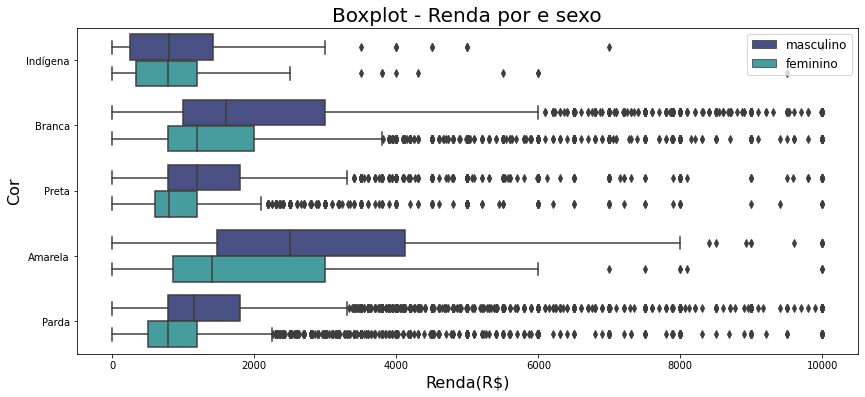

In [59]:
#Na construção do boxplot, irei fazer apenas com os dados das pessoas que apresentam renda menor ou igual a R$10000,00
dados_filtrado = dados[dados.Renda <= 10000]
boxplot = sns.boxplot(data = dados_filtrado, x = 'Renda', y = 'Cor', orient = 'h', hue = 'Sexo', palette = 'mako')
boxplot.figure.set_size_inches(14,6) #tamanho da figura
boxplot.set_xlabel('Renda(R$)', fontsize = 16) 
boxplot.set_title('Boxplot - Renda por e sexo', fontsize = 20); #título do boxplot
boxplot.set_ylabel('Cor', fontsize = 16)
boxplot.set_yticklabels(labels = ['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração']) #labels eixo y
handles, _ = boxplot.get_legend_handles_labels()
boxplot.legend(handles, ['masculino', 'feminino'], fontsize = 12)

> ### Conclusões

A partir da visualização acima é perceptível que os homens independentemente da cor apresentam uma renda maior que a das mulheres. 
Além disso é observado no boxplot que a cor branca e amarela apresentam uma renda maior que as demais.

### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?


In [60]:
from scipy import stats
pessoas_sm = dados[dados.Renda <= 788].shape[0]
pessoas_total = dados.shape[0]
percentual_pessoas_sm = pessoas_sm / pessoas_total
percentual_pessoas_sm = round(percentual_pessoas_sm*100,2)
print(f'O percentual de pessoas do nosso dataset que ganham até um salário minimo é de {percentual_pessoas_sm} %')

O percentual de pessoas do nosso dataset que ganham até um salário minimo é de 28.87 %


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?

In [61]:
print(f'O valor maximo de renda ganho por 99% das pessoas no dataset é R${dados.Renda.quantile(q = 0.99)}')

O valor maximo de renda ganho por 99% das pessoas no dataset é R$15000.0


### Observando a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [62]:
funcs3 = {'mean','std', 'median', 'max'}
tabela_2 = pd.crosstab(index = dados['Anos de Estudo'], columns = dados.Sexo, values = dados.Renda, aggfunc = funcs3)
tabela_2.rename(index = anos_de_estudo, columns = sexo, inplace = True)
tabela_2

max            ...          std             
Sexo                           Masculino  Feminino  ...    Masculino     Feminino
Anos de Estudo                                      ...                          
Sem instrução e menos de 1 ano   30000.0   10000.0  ...  1023.904884   639.311534
1 ano                            30000.0    2000.0  ...  1331.950552   425.291842
2 anos                           40000.0    4000.0  ...  1435.173827   498.234168
3 anos                           80000.0    3500.0  ...  2143.800133   424.124446
4 anos                           50000.0   10000.0  ...  1419.821787   629.553397
5 anos                           35000.0    8000.0  ...  1484.650587   635.782641
6 anos                           25000.0    6000.0  ...  1476.628602   574.547028
7 anos                           40000.0    9000.0  ...  1419.708673   602.038029
8 anos                           30000.0   18000.0  ...  1515.583715   896.781213
9 anos                           60000.0   20000.0  ...  2137.664774   973.221652
10 anos                          45000.0    6000.0  ...  2078.609734   620.611907
11 anos                         200000.0  100000.0  ...  2676.538942  1819.040417
12 anos                          30000.0  120000.0  ...  2268.081538  4851.833513
13 anos                          25000.0   20000.0  ...  2797.116800  2053.789771
14 anos                          50000.0   20000.0  ...  3987.214974  2064.083336
15 anos ou mais                 200000.0  100000.0  ...  7447.613594  4212.770709
Não determinados                  7000.0    3000.0  ...   979.648745   459.985964

[17 rows x 8 columns]

### Construindo um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

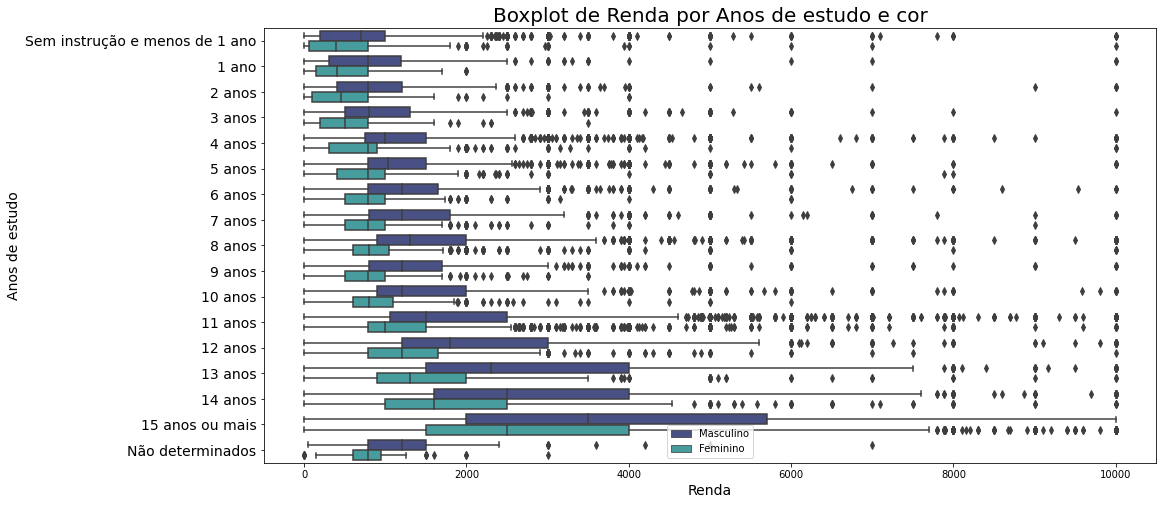

In [67]:
#Construção do boxplot a partir de dados que apresentem uma renda inferior ou igual a R$10.000,00
anos_de_estudo_list = list(anos_de_estudo.values())
boxplot2 = sns.boxplot(data = dados_filtrado, x = 'Renda', y = 'Anos de Estudo', orient = 'h', palette = 'mako', hue = 'Sexo')
boxplot2.figure.set_size_inches(16,8)
boxplot2.set_title('Boxplot de Renda por Anos de estudo e cor', fontsize = 20)
boxplot2.set_xlabel('Renda', fontsize = 14)
boxplot2.set_ylabel('Anos de estudo', fontsize = 14)
boxplot2.set_yticklabels(labels = anos_de_estudo_list, fontsize = 14);
handles, _ = boxplot2.get_legend_handles_labels()
boxplot2.legend(handles, ['Masculino', 'Feminino']);

> ### Conclusões

A partir do boxplot acima é perceptível que existe uam desigualdade entre a renda de homens e mulheres.

É observado pela visualização do boxplot acima que as mulheres mesmo que com mais anos de estudos que os homens ainda apresentam uma renda inferior a deles.

abaixo iriei realizar mais um boxplot com as mesmas variéveis, porém entre pessoas com a mesma idade para observar se esta desigualdade ainda é observada.

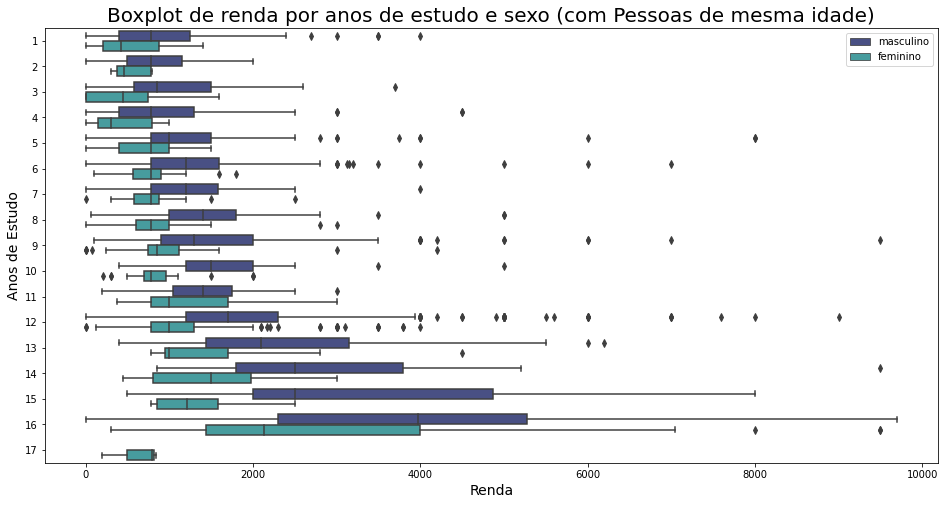

In [64]:
# selecionando a apenas pessoas que apresentam uma renda menor ou igual a R$10.000,00 e idade igual a 40 anos
selecao = (dados.Renda < 10000) & (dados.Idade == 40)
dados_filtrados2 = dados[selecao]
boxplot3 = sns.boxplot(data = dados_filtrados2, x = "Renda", y = 'Anos de Estudo',
                       hue = 'Sexo', palette = 'mako', orient = 'h')
boxplot3.figure.set_size_inches(16,8)
boxplot3.set_title('Boxplot de renda por anos de estudo e sexo (com Pessoas de mesma idade)', fontsize = 20)
boxplot3.set_xlabel('Renda', fontsize = 14)
boxplot3.set_ylabel('Anos de Estudo', fontsize = 14);
handles, _ = boxplot3.get_legend_handles_labels()
boxplot3.legend(handles,['masculino', 'feminino'])

### Conclusões
Mesmo realizando o boxplot com pessoas de mesma idade a desigualdade de renda entre homens e mulheres ainda fica evidente, com pessoas do sexo feminino com mais anos de estudo apresentando uma renda inferior a de pessoas do sexo masculino com menos anos de estudo.

### Observando a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

In [65]:
tabela_3 = dados.groupby(['UF']).agg(func = {'Renda': ['mean', 'median', 'max', 'std']})
tabela_3.rename(index = uf, columns = {'mean': 'média', 'median': 'mediana', 'max': 'máximo', 'std': 'desvio padrão'}, inplace = True)
tabela_3

Renda                              
                           média mediana  máximo desvio padrão
UF                                                            
Rondônia             1789.761223    1200   50000   2406.161161
Acre                 1506.091782     900   30000   2276.233415
Amazonas             1445.130100     900   22000   1757.935591
Roraima              1783.588889    1000   20000   2079.659238
Pará                 1399.076871     850   50000   2053.779555
Amapá                1861.353516    1200   15580   2020.688632
Tocantins            1771.094946    1000   60000   2934.590741
Maranhão             1019.432009     700   30000   1887.816905
Piauí                1074.550784     750   40000   2373.355726
Ceará                1255.403692     789   25000   1821.963536
Rio Grande do Norte  1344.721480     800   15500   1651.805500
Paraíba              1293.370487     788   30000   1950.272431
Pernambuco           1527.079319     900   50000   2389.622497
Alagoas              1144.552602     788   11000   1237.856197
Sergipe              1109.111111     788   16000   1478.997878
Bahia                1429.645094     800  200000   3507.917248
Minas Gerais         2056.432084    1200  100000   3584.721547
Espírito Santo       2026.383852    1274  100000   3513.846868
Rio de Janeiro       2496.403168    1400  200000   5214.583518
São Paulo            2638.104986    1600   80000   3503.777366
Paraná               2493.870753    1500  200000   4302.937995
Santa Catarina       2470.854945    1800   80000   3137.651112
Rio Grande do Sul    2315.158336    1500   35000   2913.335783
Mato Grosso do Sul   2262.604167    1500   42000   3031.419122
Mato Grosso          2130.652778    1500   35000   2542.630178
Goiás                1994.580794    1500   30000   2221.933065
Distrito Federal     4241.954722    2000  100000   5550.463338

### Construindo um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO com dados de pessoas que apresentem uma renda de até R$10.000,00 para uma melhor visualização do boxplot

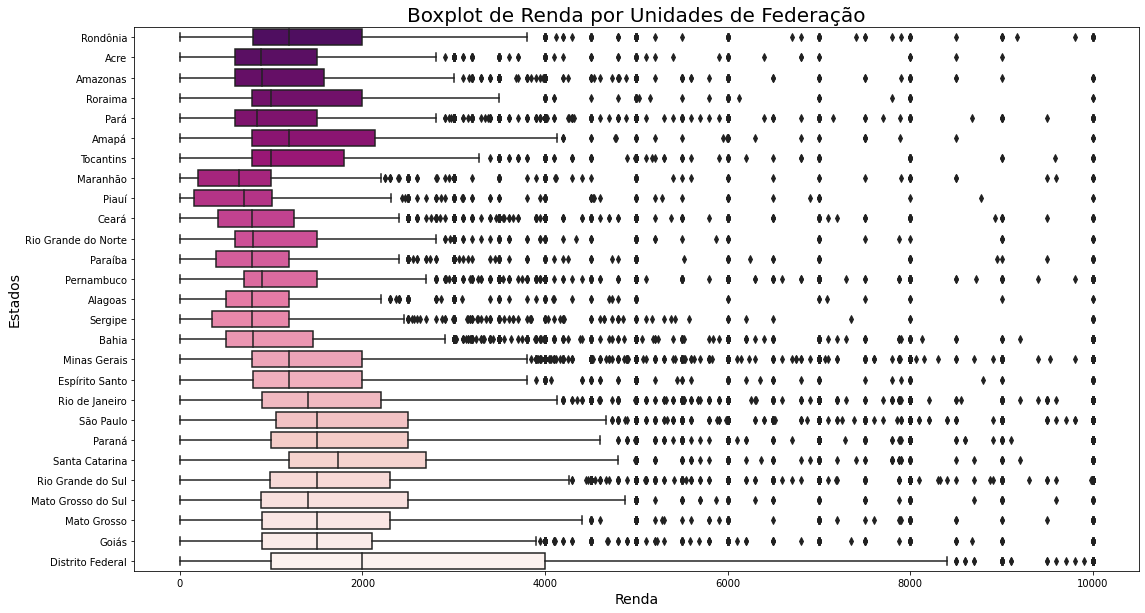

In [66]:
uf_list = uf.values();
boxplot4 = sns.boxplot(data = dados_filtrado, x = 'Renda', y = 'UF', orient = 'h', palette = 'RdPu_r')
boxplot4.figure.set_size_inches(18,10)
boxplot4.set_xlabel('Renda', fontsize = 14)
boxplot4.set_ylabel('Estados', fontsize = 14)
boxplot4.set_title('Boxplot de Renda por Unidades de Federação', fontsize = 20)
boxplot4.set_yticklabels(labels = uf_list);

> ### Conclusões

A partir do boxplot de renda por unidade de federação, é visível que algumas unidades apresentam uma renda maior que as demais como por exemplo o Distrito Federal. Assim como as unidades da região sudeste apresentam uma uma renda maior que as da região nordeste e norte.

Isto deve ocorrer porque cada estado apresenta um custo de vida diferente, além de algumas unidades apresentarem maior desenvolvimento.